In [7]:
from Forest_Fire import ForestFire
from map_generator import display_map, square_burn
import geopandas
from matplotlib import pyplot as plt
import imageio

In [4]:
num_squares = 3
fire = ForestFire((num_squares + 1) * 10, (num_squares + 1) * 10, 0.8)
fire.run_model()
world['square_color'] = square_burn(fire.MatrixHistory[0],num_squares)

/Users/julianchan/anaconda3/envs/test/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
/Users/julianchan/anaconda3/envs/test/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


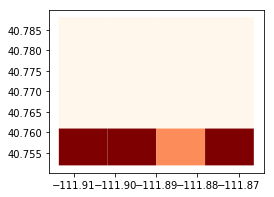

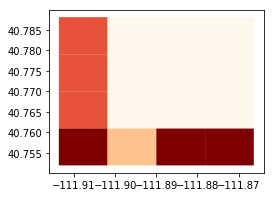

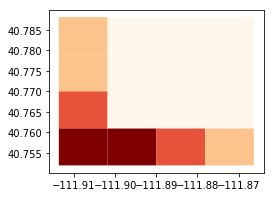

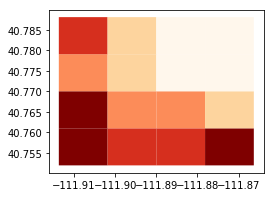

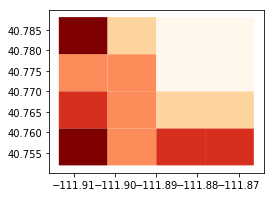

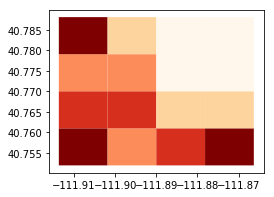

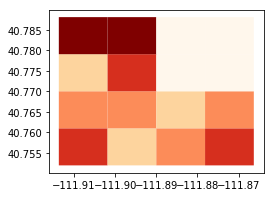

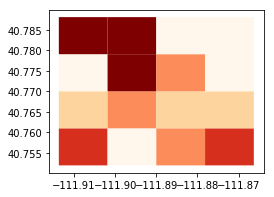

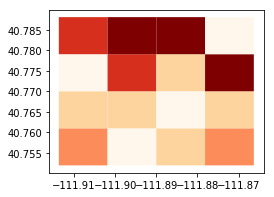

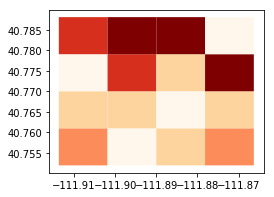

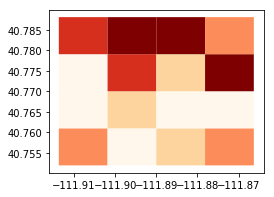

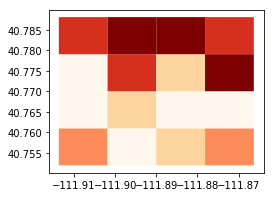

In [6]:
def make_animation(matrix, ):
    world = geopandas.read_file('area.geojson')
    images = []
    for i in range(0, len(matrix), 10000):
        world['square_color'] = square_burn(fire.MatrixHistory[i],num_squares)
        world.plot(column='square_color', cmap='OrRd', scheme='quantiles', figsize=(10, 3))
        #plt.axis((-180+i, -90+i, 0, 90))
        filename = 'tiles/slice{:0d}.png'.format(i)
        plt.savefig(filename)
        images.append(imageio.imread(filename))
    imageio.mimsave('output.gif', images, fps=10)